In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/netflix_users.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User_ID                      25000 non-null  int64  
 1   Name                         25000 non-null  object 
 2   Age                          25000 non-null  int64  
 3   Country                      25000 non-null  object 
 4   Subscription_Type            25000 non-null  object 
 5   Watch_Time_Hours             25000 non-null  float64
 6   Favorite_Genre               25000 non-null  object 
 7   Last_Login                   25000 non-null  object 
 8   satisfaction_score           25000 non-null  float64
 9   daily_watch_hours            25000 non-null  float64
 10  engagement_rate              25000 non-null  float64
 11  primary_device               25000 non-null  object 
 12  payment_history              25000 non-null  object 
 13  support_queries 

In [4]:
df.isna().sum()

User_ID                        0
Name                           0
Age                            0
Country                        0
Subscription_Type              0
Watch_Time_Hours               0
Favorite_Genre                 0
Last_Login                     0
satisfaction_score             0
daily_watch_hours              0
engagement_rate                0
primary_device                 0
payment_history                0
support_queries                0
monthly_income                 0
promo_offers_used              0
profile_count                  0
churn_risk_score               0
churn_status                   0
preferred_watching_time        0
content_language_preference    0
dtype: int64

In [5]:
df['Subscription_Type'].value_counts()

Subscription_Type
Premium     8402
Basic       8356
Standard    8242
Name: count, dtype: int64

In [6]:
df['monthly_income'].value_counts()
df['monthly_income'].min() , df['monthly_income'].max() 
df['monthly_income'].describe()

count    25000.000000
mean      3618.189840
std       1483.751561
min       -417.000000
25%       2436.000000
50%       3516.000000
75%       4663.000000
max       9696.000000
Name: monthly_income, dtype: float64

<Figure size 1000x600 with 0 Axes>

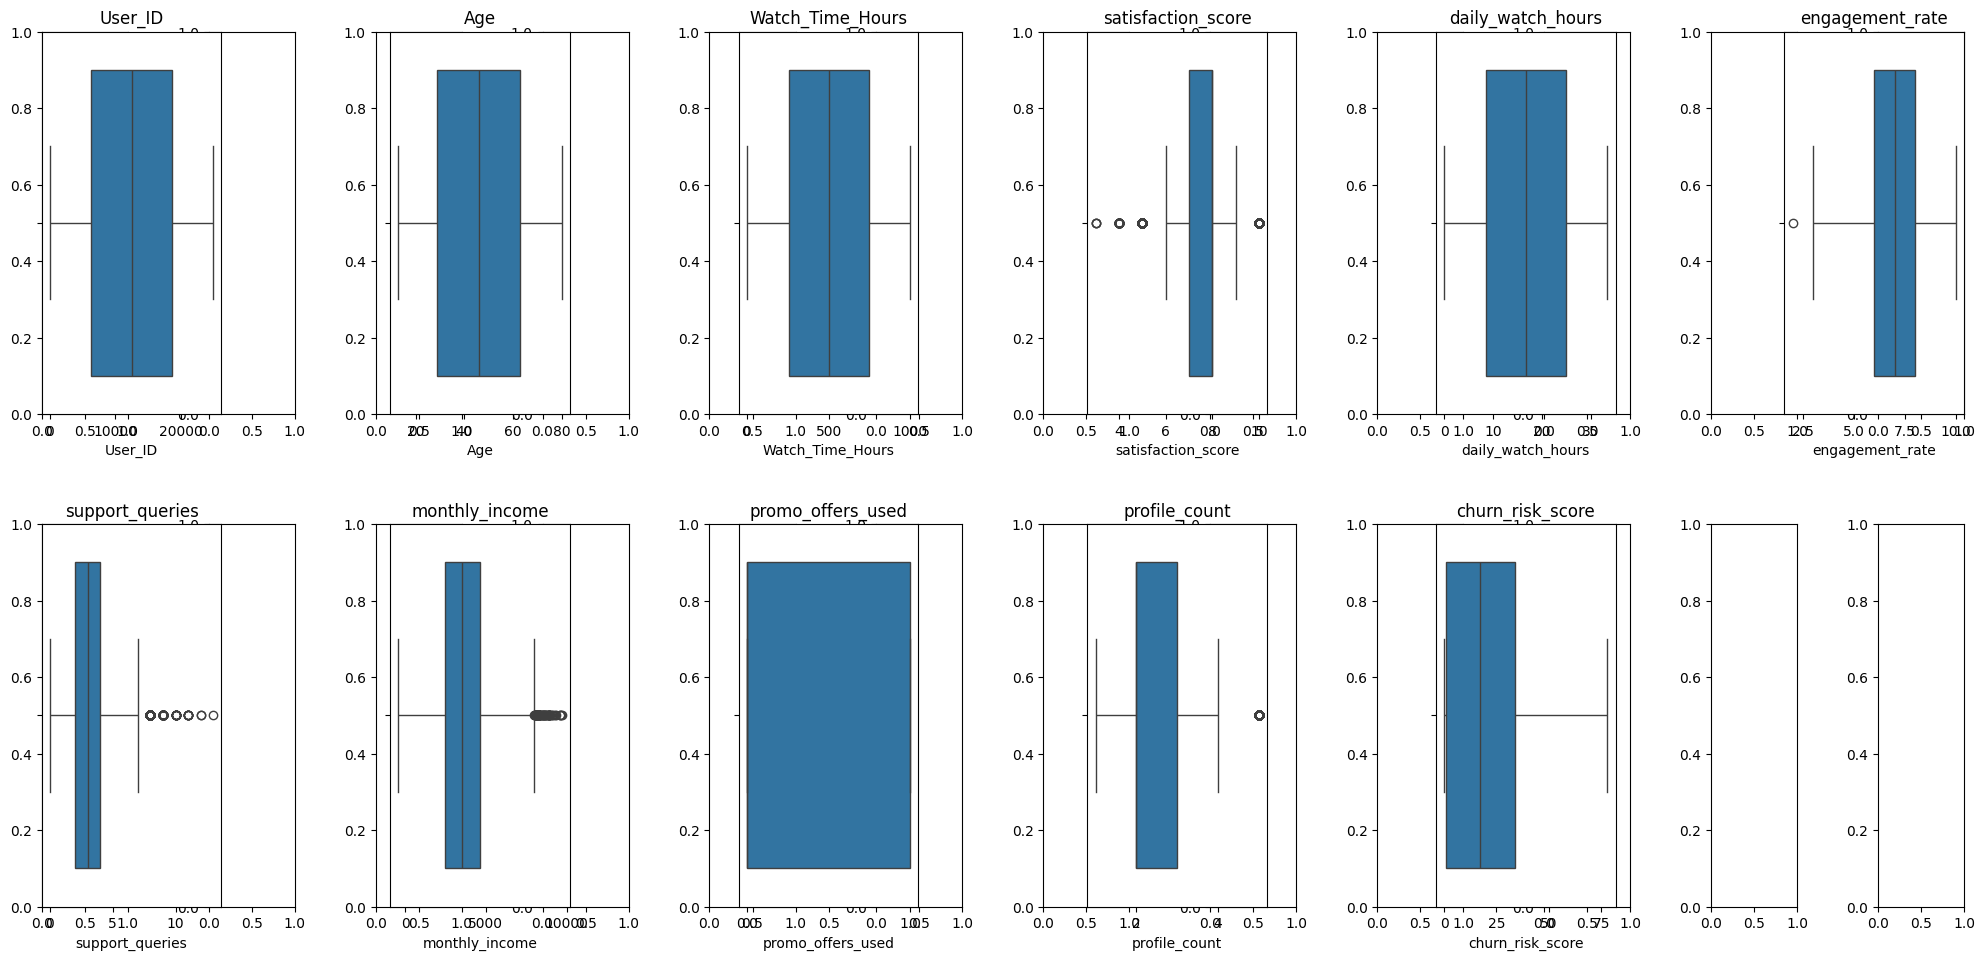

In [7]:
# box plot 
plt.figure(figsize=(10, 6))
columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.subplots(2, 12 , figsize=(20, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 6, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

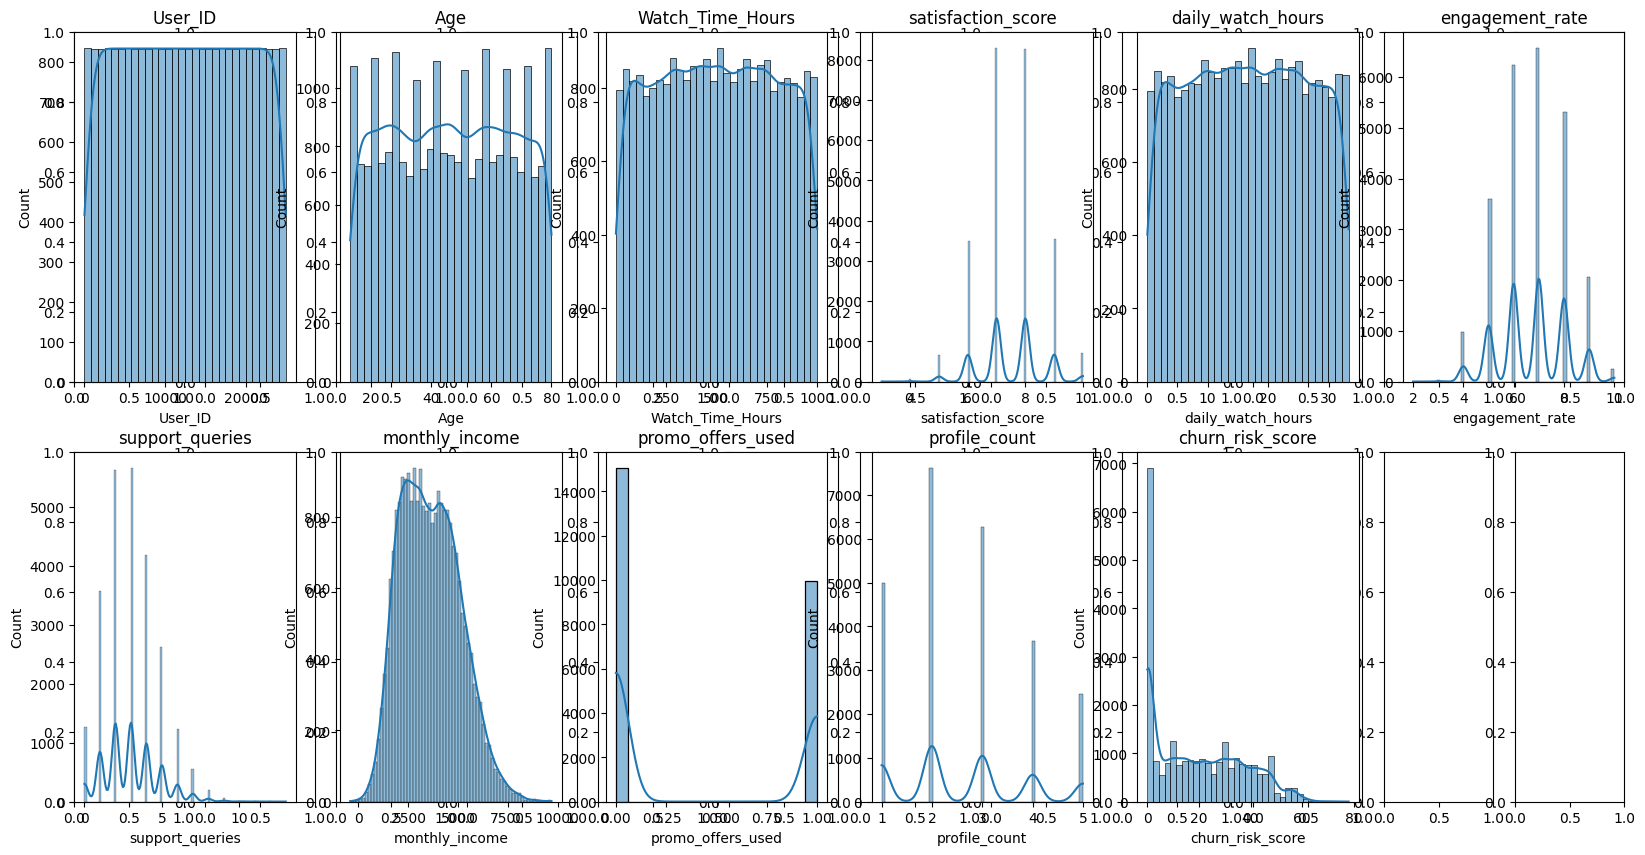

In [8]:
# histogram
plt.subplots(2, 12 , figsize=(20, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 6, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.show()


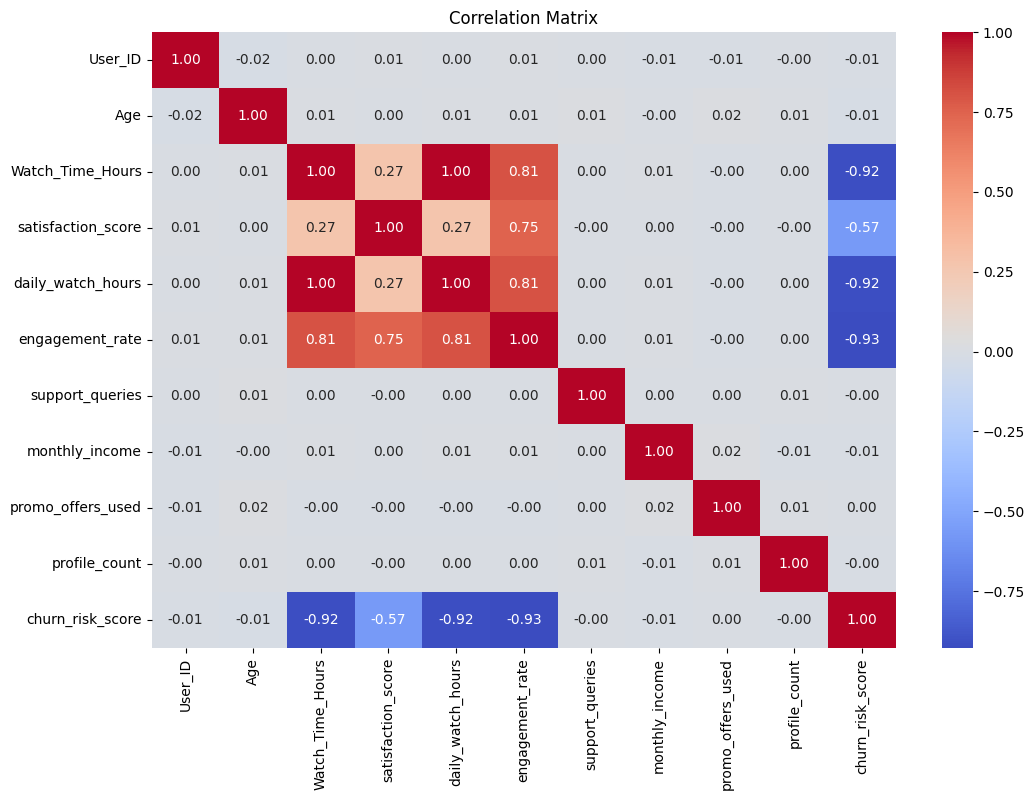

In [9]:
# correlation matrix
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

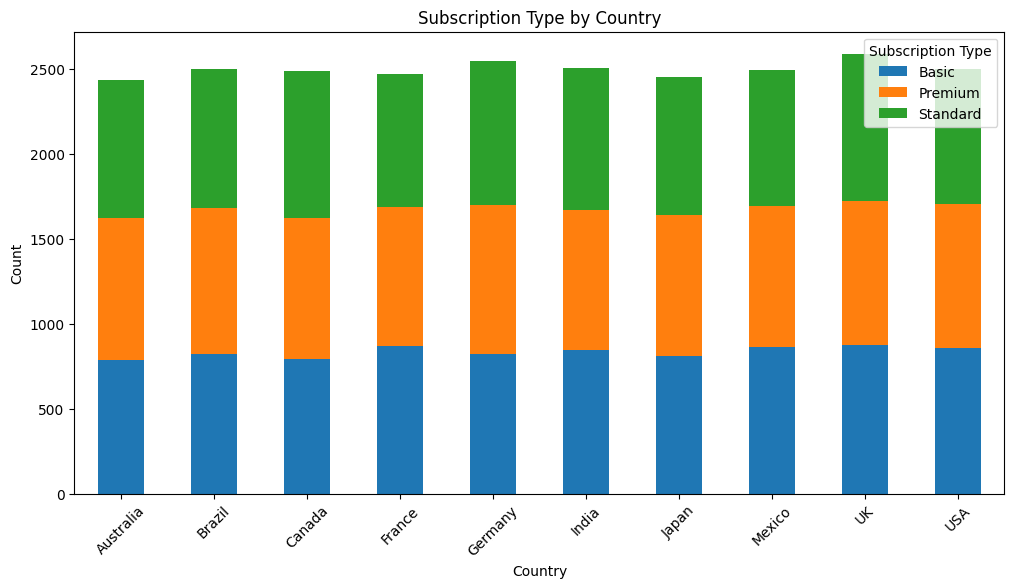

In [10]:
# 국가별 
df.groupby('Country')['Subscription_Type'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Subscription Type by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()

In [14]:
df.groupby('Country')['satisfaction_score'].mean()

Country
Australia    7.519902
Brazil       7.523771
Canada       7.490763
France       7.521229
Germany      7.505300
India        7.474651
Japan        7.475376
Mexico       7.482551
UK           7.494213
USA          7.510587
Name: satisfaction_score, dtype: float64

<Axes: xlabel='primary_device'>

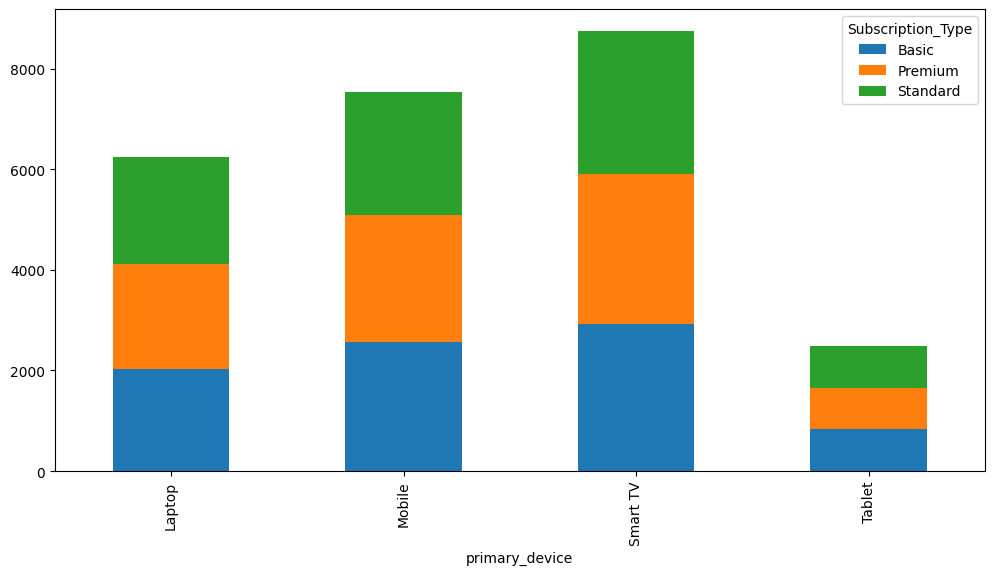

In [21]:
df.groupby('primary_device')['Subscription_Type'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

<Axes: xlabel='primary_device'>

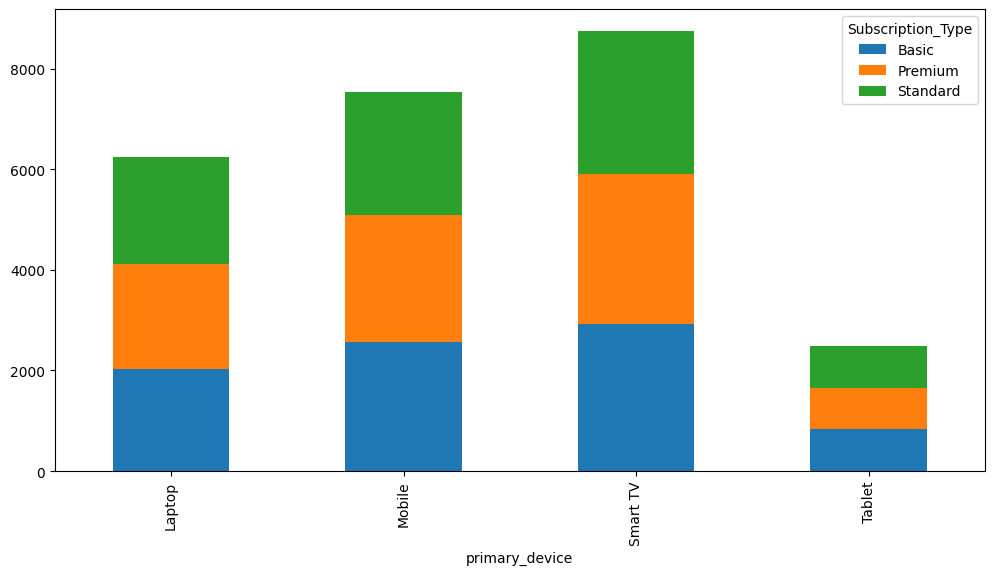

In [23]:
df.groupby('primary_device')['Subscription_Type'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))